$
\newcommand{\Tau}{\mathcal{T}}
\newcommand{\bm}[1]{{\boldsymbol{#1}}}
\newcommand{\dt}[1]{{\frac{d#1}{dt}}}
%\newcommand{\bm}{\mathbf{#1}}
\newcommand{\trsp}{{\scriptscriptstyle\top}}$

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pbdlib as pbd
from scipy.io import loadmat # loading data from matlab

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Hidden Markov Model and LQR
This is an example of learning a HMM over some trajectories demonstrations and reproducing it using optimal control.
More infos : http://calinon.ch/papers/Calinon-JIST2015.pdf 


## Learning Hidden Markov Model (HMM)

In [24]:
# have 4 demonstrations
data = np.load('dataset/test_001.npy', allow_pickle=True,encoding="latin1")[()] 
# adding encoding="latin1" for reading Python2 objects.

In [33]:
# demos_x : (4, 69, 2)

demos_x = data['x']  #Position data
demos_dx = data['dx'] # Velocity data
demos_xdx = [np.hstack([_x, _dx]) for _x ,_dx in zip(demos_x, demos_dx)] # Position-velocity

print('shape demos: {}'.format(np.shape(demos_x[])))


shape demos: (96, 2)


# Time aligning

#### Original trajectories 

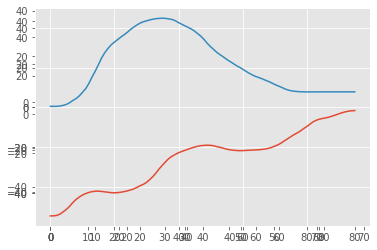

In [4]:
for d in demos_x:
    plt.axes().set_prop_cycle(None)
    plt.plot(d)

In [11]:
demos_x, demos_dx, demos_xdx = pbd.utils.align_trajectories(demos_x, [demos_dx, demos_xdx]) 

t = np.linspace(0, 100, demos_x[0].shape[0])
print( demos_x[0].shape[0])

96


#### Aligned trajectories and time

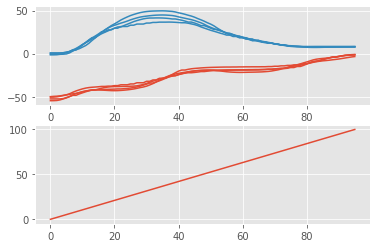

In [6]:
fig, ax = plt.subplots(nrows=2)
for d in demos_x:
    ax[0].set_prop_cycle(None)
    ax[0].plot(d)
    
ax[1].plot(t)

## Create augmented data with time 

In [13]:
demos = [np.hstack([t[:,None], d]) for d in demos_xdx]
data = np.vstack([d for d in demos])

(384, 5)


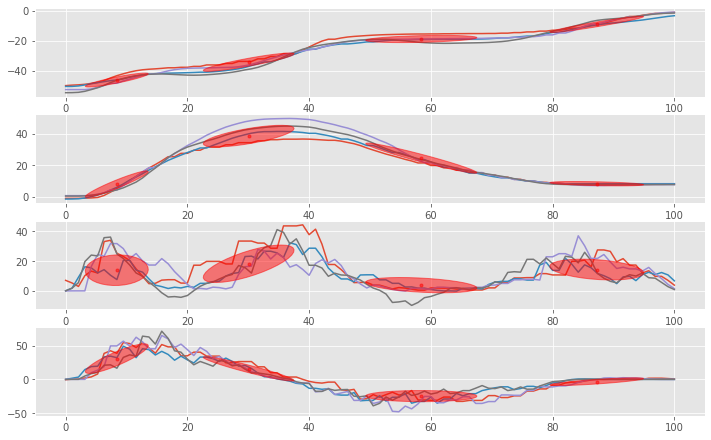

In [12]:
model = pbd.GMM(nb_states=4, nb_dim=6)

model.init_hmm_kbins(demos) # initializing model

# EM to train model
print( np.shape(data)
print(data)

model.em(data, reg=[0.1, 1., 1., 1., 1.]) 


# plotting
fig, ax = plt.subplots(nrows=4)
fig.set_size_inches(12,7.5)

# position plotting

for i in range(4):

    for p in demos:
        ax[i].plot(p[:, 0], p[:, i + 1])

    pbd.plot_gmm(model.mu, model.sigma, ax=ax[i], dim=[0, i + 1]);


## Synthesis 

In [20]:
mu, sigma = model.condition(t[:, None], dim_in=slice(0, 1), dim_out=slice(1, 5))
print(slice(0, 1))
print(slice(1, 5))
print(t[:, None])



slice(0, 1, None)
slice(1, 5, None)
[[  0.        ]
 [  1.05263158]
 [  2.10526316]
 [  3.15789474]
 [  4.21052632]
 [  5.26315789]
 [  6.31578947]
 [  7.36842105]
 [  8.42105263]
 [  9.47368421]
 [ 10.52631579]
 [ 11.57894737]
 [ 12.63157895]
 [ 13.68421053]
 [ 14.73684211]
 [ 15.78947368]
 [ 16.84210526]
 [ 17.89473684]
 [ 18.94736842]
 [ 20.        ]
 [ 21.05263158]
 [ 22.10526316]
 [ 23.15789474]
 [ 24.21052632]
 [ 25.26315789]
 [ 26.31578947]
 [ 27.36842105]
 [ 28.42105263]
 [ 29.47368421]
 [ 30.52631579]
 [ 31.57894737]
 [ 32.63157895]
 [ 33.68421053]
 [ 34.73684211]
 [ 35.78947368]
 [ 36.84210526]
 [ 37.89473684]
 [ 38.94736842]
 [ 40.        ]
 [ 41.05263158]
 [ 42.10526316]
 [ 43.15789474]
 [ 44.21052632]
 [ 45.26315789]
 [ 46.31578947]
 [ 47.36842105]
 [ 48.42105263]
 [ 49.47368421]
 [ 50.52631579]
 [ 51.57894737]
 [ 52.63157895]
 [ 53.68421053]
 [ 54.73684211]
 [ 55.78947368]
 [ 56.84210526]
 [ 57.89473684]
 [ 58.94736842]
 [ 60.        ]
 [ 61.05263158]
 [ 62.10526316]
 [ 6

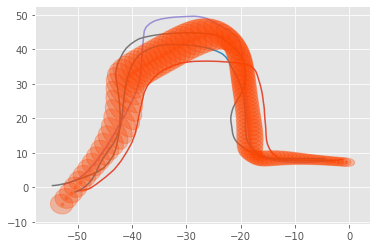

In [15]:
pbd.plot_gmm(mu, sigma, dim=[0, 1], color='orangered', alpha=0.3)

for d in demos_x:
    plt.plot(d[:, 0], d[:, 1])